# 12.3. Simulating an ordinary differential equation with SciPy

In [5]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
m = 1.  # particle's mass
k = 1.  # drag coefficient
g = 9.81  # gravity acceleration

In [14]:
# The initial position is (0, 0).
v0 = np.zeros(4)
# The initial speed vector is oriented
# to the top right.
v0[2] = 4.
v0[3] = 10.

u, udot = v0[:2], v0[2:]

[ -4.   -19.81]


In [8]:
def f(v, t0, k):
    # v has four components: v=[u, u'].
    u, udot = v[:2], v[2:]
    # We compute the second derivative u'' of u.
    udotdot = -k / m * udot
    udotdot[1] -= g
    # We return v'=[u', u''].
    return np.r_[udot, udotdot]

(0, 6)

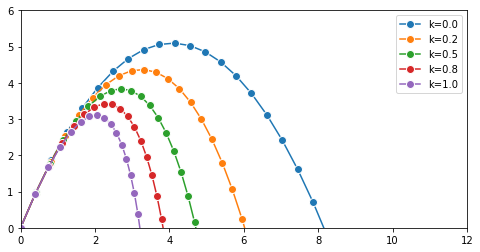

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

# We want to evaluate the system on 30 linearly
# spaced times between t=0 and t=3.
t = np.linspace(0., 3., 30)

# We simulate the system for different values of k.
for k in np.linspace(0., 1., 5):
    # We simulate the system and evaluate $v$ on the
    # given times.
    v = spi.odeint(f, v0, t, args=(k,))
    # We plot the particle's trajectory.
    ax.plot(v[:, 0], v[:, 1], 'o-', mew=1, ms=8,
            mec='w', label=f'k={k:.1f}')
ax.legend()
ax.set_xlim(0, 12)
ax.set_ylim(0, 6)